# EDSA Apple Price Challenge

@ Melusi Zwane
@ Itumeleng Mabaso
@ Onkarabile Tshele
@ Lydia Lehutjo
@ Samuel Moloantoa

## Problem background
Imagine you are in the Fresh Produce Industry. How much stock do you have on hand? Not too little that you run out of stock when customers want to buy more. And not too much that food waste occurs. How do you set your prices? Yields from farms fluctuate by season. Should your prices then also fluctuate by season?

We want to construct a regression algorithm, capable of accurately predicting how much a kilogram of Golden Delicious Apples will cost, given certain parameters.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being able to accurately determine how much stock to have on hand and what price to set the Golden Delicious Apples to.

![Random Unsplash Image](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2Fa6f42bf10f698f6d5fa3cf2ec3731941%2Fshutterstock_99365936Optimized.jpg?generation=1603875345551681&alt=media)

# Contents Outline 
1. Data cleaning and formatting
2. Exploratory data analysis
3. Feature engineering and selection
4. Model selection and evaluation
5. Model results
6. Conclusion

# Importing Libraries

In [11]:
# Regression models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Other
import numpy as np
import pandas as pd
from scipy import stats
import math
import pickle
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [10]:
train = pd.read_csv('https://raw.githubusercontent.com/onkarabiletshele/Regression_AM6_DSFT/main/Data/df-train_set.csv')
test = pd.read_csv('https://raw.githubusercontent.com/onkarabiletshele/Regression_AM6_DSFT/main/Data/df-test_set.csv')
sample_submission = pd.read_csv('https://raw.githubusercontent.com/onkarabiletshele/Regression_AM6_DSFT/main/Data/sample_submission.csv')


index = test['Index']
test = test.drop('Index', axis=1)

# 1. Data cleaning and formatting

Since our focus is on Apple Golden Delicious only, we will filter out Apple Golden and drop the Commodities.

In [12]:
train = train[train['Commodities']=='APPLE GOLDEN DELICIOUS'].drop(columns='Commodities')

In [17]:
train.shape

(1952, 13)

In [13]:
train.head()

Province Container Size_Grade  Weight_Kg        Date  \
1                   CAPE     M4183         1L       18.3  2020-09-09   
7                   CAPE     JG110         2M       11.0  2020-04-14   
24  W.CAPE-BERGRIVER ETC     JE090         2S        9.0  2020-04-16   
40                  CAPE     M4183         1S       18.3  2020-05-04   
69          EASTERN CAPE     IA400         1S      400.0  2020-09-28   

    Low_Price  High_Price  Sales_Total  Total_Qty_Sold  Total_Kg_Sold  \
1       150.0       170.0      51710.0             332         6075.6   
7        50.0        50.0      16000.0             320         3520.0   
24       55.0        55.0        990.0              18          162.0   
40       80.0       120.0      32020.0             388         7100.4   
69     1800.0      1800.0       1800.0               1          400.0   

    Stock_On_Hand  avg_price_per_kg  
1             822              8.51  
7               0              4.55  
24           1506              6.11  
40            443              4.51  
69              2              4.50

In [23]:
# Summary statistics
train.describe()

Weight_Kg    Low_Price   High_Price    Sales_Total  Total_Qty_Sold  \
count  1952.000000  1952.000000  1952.000000    1952.000000     1952.000000   
mean     40.460912   174.307377   215.648053   20053.533811      174.510758   
std      99.655169   373.553578   433.546159   39005.069445      308.810797   
min       3.000000     2.000000     5.000000       5.000000        1.000000   
25%       9.000000    50.000000    60.000000    1325.000000       12.000000   
50%      12.000000    80.000000   108.000000    5495.000000       64.000000   
75%      18.300000   127.250000   160.000000   21082.500000      200.000000   
max     400.000000  2300.000000  3300.000000  369464.000000     4237.000000   

       Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg          Day  \
count    1952.000000    1952.000000       1952.000000  1952.000000   
mean     2960.176332     408.393955          6.778893    15.866291   
std      6097.416527     724.450582          2.248744     8.705740   
min         3.000000       0.000000          0.250000     1.000000   
25%       219.600000       9.000000          5.460000     9.000000   
50%       853.500000     126.500000          6.670000    16.000000   
75%      3093.525000     468.000000          8.280000    23.000000   
max     74000.000000    6400.000000         21.240000    31.000000   

             Month  
count  1952.000000  
mean      5.609119  
std       2.687248  
min       1.000000  
25%       3.000000  
50%       6.000000  
75%       7.000000  
max      12.000000

In [24]:
# Evaluate for correct data types 
train.dtypes

Province             object
Container            object
Size_Grade           object
Weight_Kg           float64
Low_Price           float64
High_Price          float64
Sales_Total         float64
Total_Qty_Sold        int64
Total_Kg_Sold       float64
Stock_On_Hand         int64
avg_price_per_kg    float64
Day                   int64
Month                 int64
dtype: object

In [25]:
# Changing the Date to Day and Month
train['Date'] = pd.to_datetime(train['Date'])
train['Day'] = train['Date'].dt.day
train['Month'] = train['Date'].dt.month
train.drop(['Date'], inplace = True, axis = 1)

KeyError: 'Date'

In [26]:
train.head(5)

Province Container Size_Grade  Weight_Kg  Low_Price  \
1                   CAPE     M4183         1L       18.3      150.0   
7                   CAPE     JG110         2M       11.0       50.0   
24  W.CAPE-BERGRIVER ETC     JE090         2S        9.0       55.0   
40                  CAPE     M4183         1S       18.3       80.0   
69          EASTERN CAPE     IA400         1S      400.0     1800.0   

    High_Price  Sales_Total  Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  \
1        170.0      51710.0             332         6075.6            822   
7         50.0      16000.0             320         3520.0              0   
24        55.0        990.0              18          162.0           1506   
40       120.0      32020.0             388         7100.4            443   
69      1800.0       1800.0               1          400.0              2   

    avg_price_per_kg  Day  Month  
1               8.51    9      9  
7               4.55   14      4  
24              6.11   16      4  
40              4.51    4      5  
69              4.50   28      9

In [27]:
# Changing the column names all to lowercase 
train.columns = ['province', 'container', 'size_grade', 'weight_kg', 'low_price', 
                 'high_price', 'sales_total', 'total_qty_sold','total_kg_sold', 
                 'stock_on_hand', 'avg_price_per_kg', 'day', 'month']

In [28]:
train

province container size_grade  weight_kg  low_price  \
1                      CAPE     M4183         1L       18.3      150.0   
7                      CAPE     JG110         2M       11.0       50.0   
24     W.CAPE-BERGRIVER ETC     JE090         2S        9.0       55.0   
40                     CAPE     M4183         1S       18.3       80.0   
69             EASTERN CAPE     IA400         1S      400.0     1800.0   
...                     ...       ...        ...        ...        ...   
64276                 NATAL     EC120         1S       12.0       96.0   
64291     ORANGE FREE STATE     M4183         1X       18.3      130.0   
64297                  CAPE     JE090         2M        9.0       50.0   
64304                  CAPE     JG110         2M       11.0       30.0   
64310  W.CAPE-BERGRIVER ETC     EC120         1M       12.0       88.0   

       high_price  sales_total  total_qty_sold  total_kg_sold  stock_on_hand  \
1           170.0      51710.0             332         6075.6            822   
7            50.0      16000.0             320         3520.0              0   
24           55.0        990.0              18          162.0           1506   
40          120.0      32020.0             388         7100.4            443   
69         1800.0       1800.0               1          400.0              2   
...           ...          ...             ...            ...            ...   
64276        96.0       1920.0              20          240.0             53   
64291       130.0       7280.0              56         1024.8             74   
64297        60.0       4540.0              89          801.0            793   
64304        40.0       2140.0              70          770.0              0   
64310       104.0       9960.0             109         1308.0             67   

       avg_price_per_kg  day  month  
1                  8.51    9      9  
7                  4.55   14      4  
24                 6.11   16      4  
40                 4.51    4      5  
69                 4.50   28      9  
...                 ...  ...    ...  
64276              8.00    4      3  
64291              7.10   22      2  
64297              5.67   22      4  
64304              2.78    4      3  
64310              7.61   23      4  

[1952 rows x 13 columns]

### Checking the distribution 

# 2. Exploratory data analysis

<AxesSubplot:xlabel='avg_price_per_kg', ylabel='Density'>

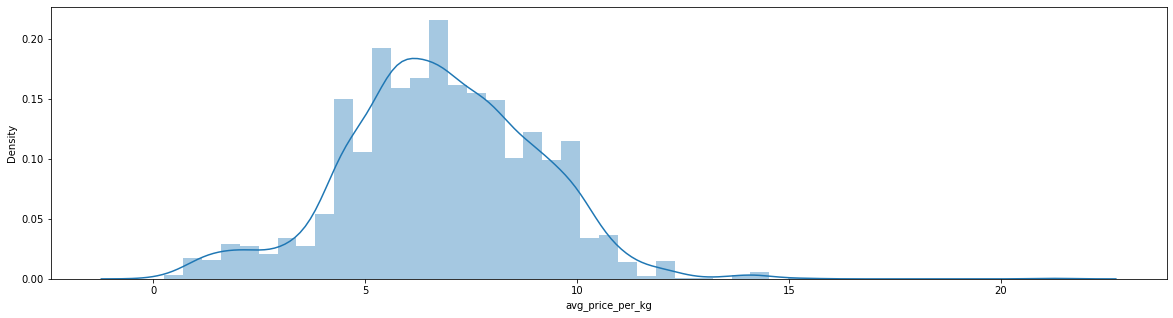

In [47]:
fig, ax = plt.subplots(figsize=(20,5))
sns.distplot(train['avg_price_per_kg'], kde=True)

To make sure our distribution is correct, we will use the table below to understand the skewness.

|   Skew Value (x)  |       Description of Data      |
|:-------------------|:---------------:|
| -0.5 < x < 0.5              |Fairly Symmetrical |
| -1 < x < -0.5 | Moderate Negative Skew  | 
| 0.5 < x < 1             | Moderate Positive Skew  | 
|       x < -1     |High Negative Skew  | 
|       x > 1  |High Positve Skew | 

In [35]:
train.skew()

weight_kg           3.328254
low_price           4.222672
high_price          3.828819
sales_total         4.250317
total_qty_sold      4.445169
total_kg_sold       5.529586
stock_on_hand       3.391815
avg_price_per_kg    0.082452
day                -0.021883
month               0.078651
dtype: float64

With this, we can conclude that our target data is moderately skewed to the right.

## Relationship between the variables

Using pairplot to see the distribtuion of single variables and relationship between them.

Text(0.5, 1.0, 'Pair Plot Of Durban Fresh Produce Market Data.')

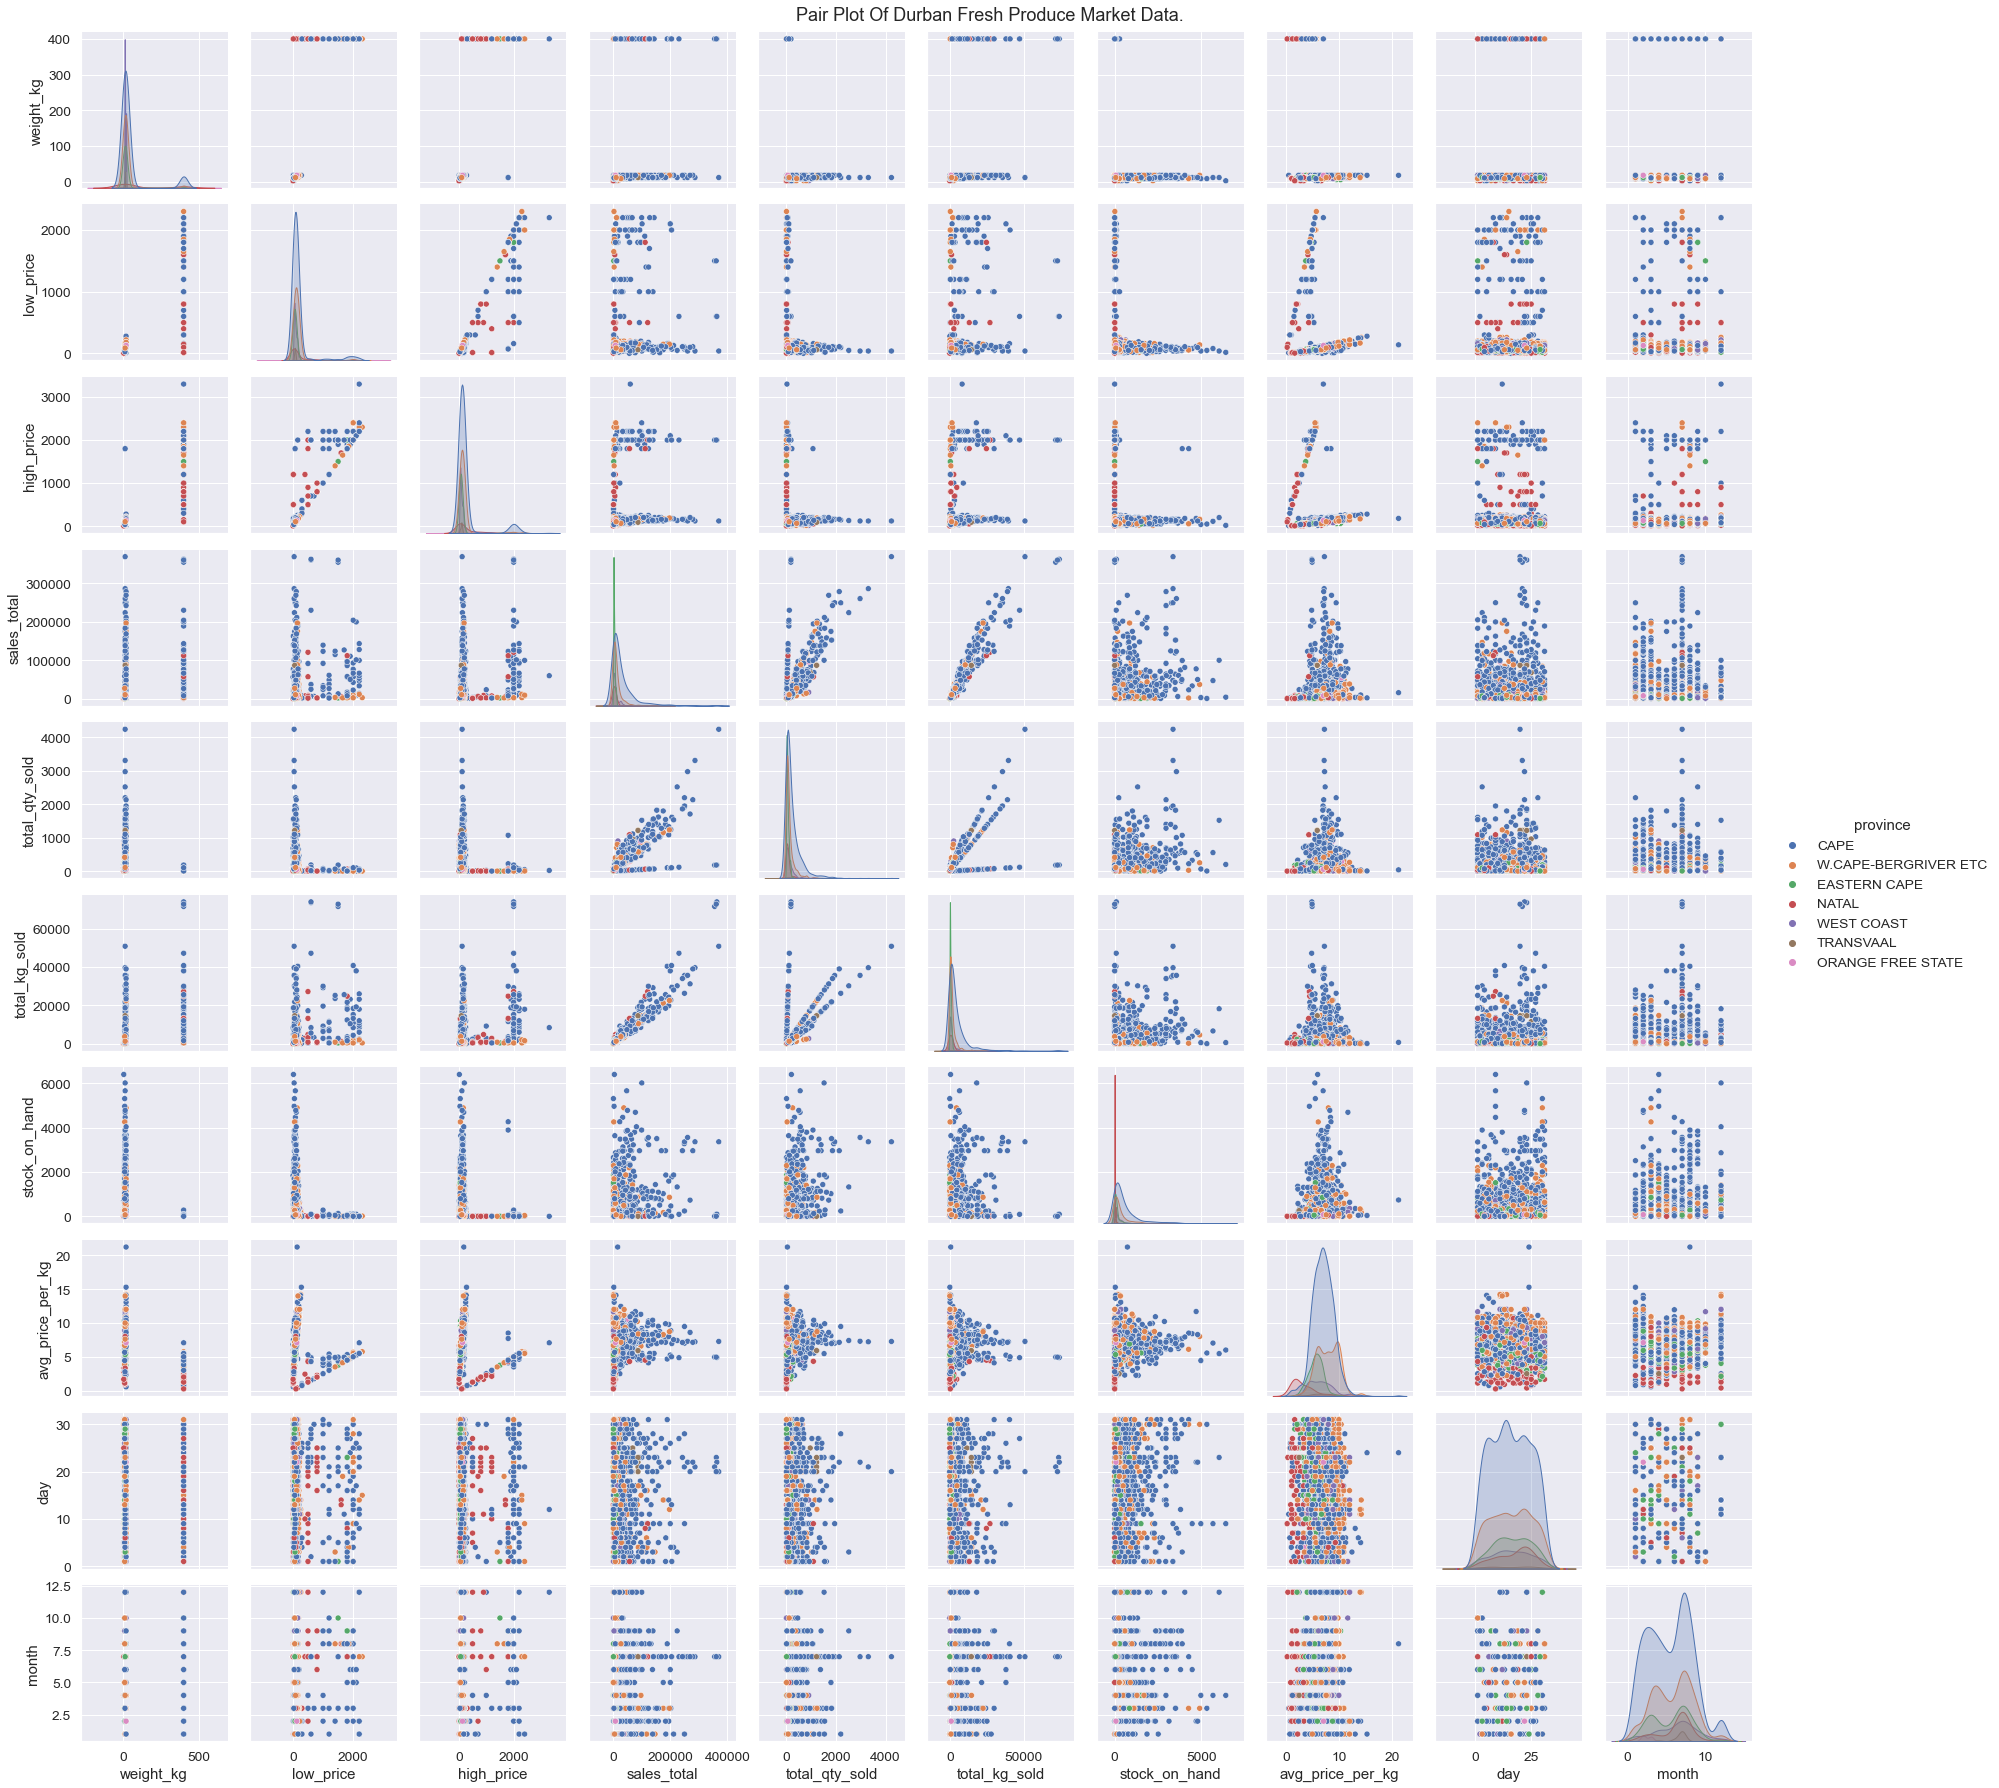

In [62]:
pplot = sns.pairplot(train, hue='province')
pplot.fig.suptitle("Pair Plot Of Durban Fresh Produce Market Data.", y=1.00) 

### 2.1 Identifying missing values

In [63]:
# Function to look for missing values in our data
def missing_values_table(df):
        # using isnull() function to get the number of missing values
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [64]:
missing_values_table(train)

Your selected dataframe has 13 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

## 2.2 Exploring the correlation between the target variable and other variables

In [52]:
# Pairwise correlation of all columnS
train.corr()

weight_kg  low_price  high_price  sales_total  \
weight_kg          1.000000   0.863182    0.905852     0.180518   
low_price          0.863182   1.000000    0.938140     0.183230   
high_price         0.905852   0.938140    1.000000     0.265672   
sales_total        0.180518   0.183230    0.265672     1.000000   
total_qty_sold    -0.133317  -0.122823   -0.096456     0.771865   
total_kg_sold      0.294117   0.269744    0.372282     0.962338   
stock_on_hand     -0.144105  -0.127677   -0.094174     0.284693   
avg_price_per_kg  -0.337886  -0.141740   -0.164496     0.108473   
day                0.016251  -0.015764    0.002058    -0.011699   
month              0.047613   0.039084    0.047717    -0.055853   

                  total_qty_sold  total_kg_sold  stock_on_hand  \
weight_kg              -0.133317       0.294117      -0.144105   
low_price              -0.122823       0.269744      -0.127677   
high_price             -0.096456       0.372282      -0.094174   
sales_total             0.771865       0.962338       0.284693   
total_qty_sold          1.000000       0.651440       0.390168   
total_kg_sold           0.651440       1.000000       0.229062   
stock_on_hand           0.390168       0.229062       1.000000   
avg_price_per_kg        0.087536      -0.001007       0.105028   
day                    -0.020402       0.003238       0.081923   
month                  -0.058639      -0.023098      -0.011749   

                  avg_price_per_kg       day     month  
weight_kg                -0.337886  0.016251  0.047613  
low_price                -0.141740 -0.015764  0.039084  
high_price               -0.164496  0.002058  0.047717  
sales_total               0.108473 -0.011699 -0.055853  
total_qty_sold            0.087536 -0.020402 -0.058639  
total_kg_sold            -0.001007  0.003238 -0.023098  
stock_on_hand             0.105028  0.081923 -0.011749  
avg_price_per_kg          1.000000 -0.071334  0.005205  
day                      -0.071334  1.000000  0.010012  
month                     0.005205  0.010012  1.000000

To observe the correlationS clearly, we will use a heatmap.

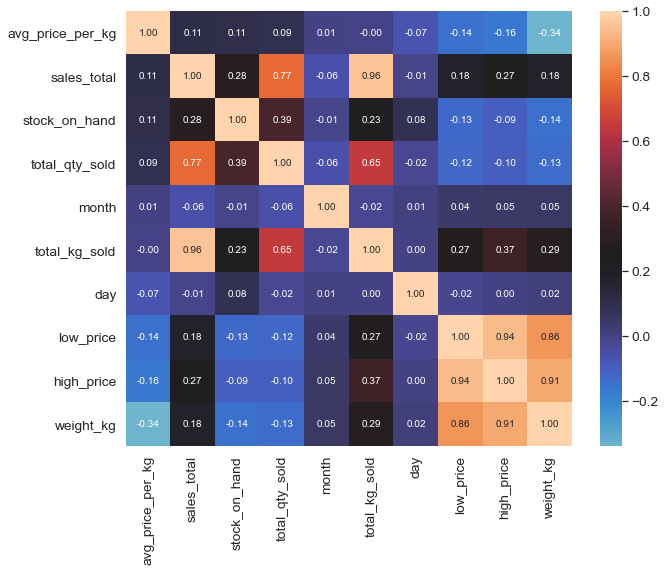

In [50]:
plt.figure(figsize=(10,8))

#avg_price_per_kg correlation matrix
cols = train.corr().nlargest(10, 'avg_price_per_kg')['avg_price_per_kg'].index
corr_mat = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)

#Plot corr matrix
sns.heatmap(corr_mat, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, center=0.25)
plt.show()

In [53]:
# Taking a look at how our numerical features correlate with our target 
corrs_numerical = pd.DataFrame(train.corr()['avg_price_per_kg'])
corrs_numerical.head(10)

avg_price_per_kg
weight_kg                -0.337886
low_price                -0.141740
high_price               -0.164496
sales_total               0.108473
total_qty_sold            0.087536
total_kg_sold            -0.001007
stock_on_hand             0.105028
avg_price_per_kg          1.000000
day                      -0.071334
month                     0.005205

From the above results, we can deduce the columns thaht have are highly correlated with our target variable.

### Visualising the corelation between the target varible and categorical variables 

In [54]:
# Encoding categorical features with dummy variables 
dummy_df = pd.get_dummies(train, drop_first=True)

In [56]:
dummy_df.head(2)

weight_kg  low_price  high_price  sales_total  total_qty_sold  \
1       18.3      150.0       170.0      51710.0             332   
7       11.0       50.0        50.0      16000.0             320   

   total_kg_sold  stock_on_hand  avg_price_per_kg  day  month  ...  \
1         6075.6            822              8.51    9      9  ...   
7         3520.0              0              4.55   14      4  ...   

   container_M9125  size_grade_1M  size_grade_1S  size_grade_1U  \
1                0              0              0              0   
7                0              0              0              0   

   size_grade_1X  size_grade_2L  size_grade_2M  size_grade_2S  size_grade_2U  \
1              0              0              0              0              0   
7              0              0              1              0              0   

   size_grade_2X  
1              0  
7              0  

[2 rows x 35 columns]

In [58]:
column_titles = [col for col in dummy_df.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
dummy_df=dummy_df.reindex(columns=column_titles)

In [61]:
# Taking a look at how our categorical features correlate with our target 
corrs_categorical = dummy_df.corr()['avg_price_per_kg'].sort_values(ascending=False)
corrs_categorical.head(10)

avg_price_per_kg                 1.000000
container_M4183                  0.403229
province_W.CAPE-BERGRIVER ETC    0.262051
size_grade_1X                    0.251451
container_EC120                  0.188162
size_grade_1M                    0.175779
container_EF120                  0.114297
sales_total                      0.108473
stock_on_hand                    0.105028
total_qty_sold                   0.087536
Name: avg_price_per_kg, dtype: float64

Below we want to evaluate features that will be useful in predicting our target using the correlation and p-value

In [65]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs_categorical.index if col!= 'avg_price_per_kg']
for col in column_titles:
    p_val = round(pearsonr(dummy_df[col], dummy_df['avg_price_per_kg'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs_categorical[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value'] < 1]

Correlation_Coefficient   P_Value
container_M4183                               0.403229  0.000000
size_grade_2S                                -0.352996  0.000000
weight_kg                                    -0.337886  0.000000
container_JE090                              -0.322235  0.000000
province_EASTERN CAPE                        -0.178531  0.000000
high_price                                   -0.164496  0.000000
size_grade_2M                                -0.153372  0.000000
low_price                                    -0.141740  0.000000
container_JG110                              -0.140148  0.000000
container_IA400                              -0.355565  0.000000
province_NATAL                               -0.379801  0.000000
province_W.CAPE-BERGRIVER ETC                 0.262051  0.000000
size_grade_1X                                 0.251451  0.000000
container_EC120                               0.188162  0.000000
size_grade_1M                                 0.175779  0.000000
container_EF120                               0.114297  0.000000
sales_total                                   0.108473  0.000002
stock_on_hand                                 0.105028  0.000003
size_grade_2L                                -0.089733  0.000072
total_qty_sold                                0.087536  0.000108
day                                          -0.071334  0.001612
size_grade_2U                                -0.069457  0.002137
container_DT063                              -0.059579  0.008465
size_grade_2X                                -0.051624  0.022556
size_grade_1S                                -0.028506  0.208071
size_grade_1U                                -0.027335  0.227373
province_WEST COAST                          -0.025122  0.267262
province_ORANGE FREE STATE                   -0.025026  0.269098
container_EG140                               0.023753  0.294217
province_TRANSVAAL                           -0.020415  0.367325
container_M6125                               0.007568  0.738257
month                                         0.005205  0.818233
container_M9125                               0.002812  0.901207
total_kg_sold                                -0.001007  0.964545

## 2.2 Identifying outliers 

<AxesSubplot:xlabel='month'>

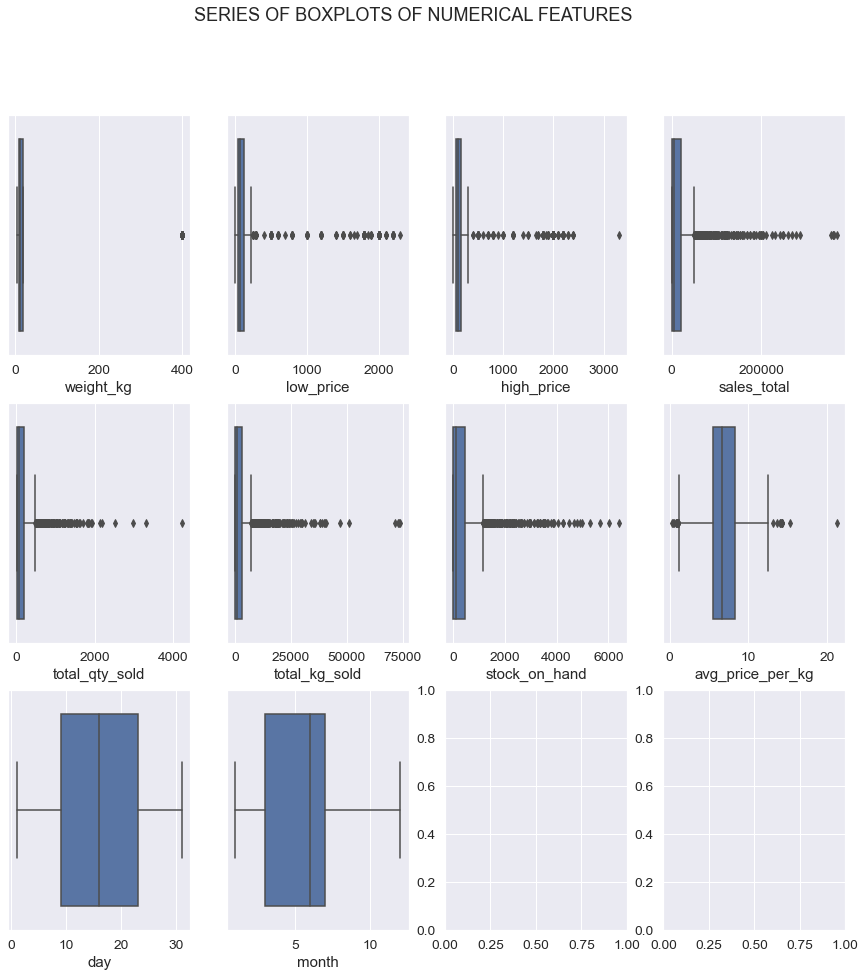

In [66]:
# Visualizing the outliers using boxplot graph 
fig, axes = plt.subplots(3, 4, figsize=(15, 15))

fig.suptitle('SERIES OF BOXPLOTS OF NUMERICAL FEATURES')

sns.boxplot(ax=axes[0, 0], data=train, x='weight_kg')
sns.boxplot(ax=axes[0, 1], data=train, x='low_price')
sns.boxplot(ax=axes[0, 2], data=train, x='high_price')
sns.boxplot(ax=axes[0, 3], data=train, x='sales_total')
sns.boxplot(ax=axes[1, 0], data=train, x='total_qty_sold')
sns.boxplot(ax=axes[1, 1], data=train, x='total_kg_sold')
sns.boxplot(ax=axes[1, 2], data=train, x='stock_on_hand')
sns.boxplot(ax=axes[1, 3], data=train, x='avg_price_per_kg')
sns.boxplot(ax=axes[2, 0], data=train, x='day')
sns.boxplot(ax=axes[2, 1], data=train, x='month')

From the above results, we can tell that a few features have outliers and to support this statement; we will use kurtosis

Kurtosis is the measure of outliers present in the data. **High kurtosis (>3)** indicates a large number of outliers and **low kurtosis (<3)** a lack of outliers. 

In [1246]:
# Checking the kurtosis of our data
train.kurtosis()

weight_kg            9.109698
low_price           17.073369
high_price          13.630768
sales_total         24.200524
total_qty_sold      32.338123
total_kg_sold       45.153801
stock_on_hand       14.671224
avg_price_per_kg     1.042921
day                 -1.122178
month               -0.620111
dtype: float64

## 3. Feature engineering and selection

[10:35:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


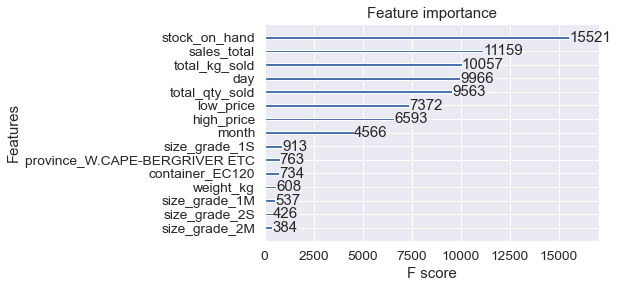

In [80]:
# plot feature importance using built-in function
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
test_size=0.30

X_fs = dummy_df.drop(columns='avg_price_per_kg')
y_fs=dummy_df['avg_price_per_kg']
X_train, X_test, y_train, y_test = train_test_split(X_fs,y_fs,test_size=test_size, random_state=42)
import matplotlib.pylab as plt
from matplotlib import pyplot



feature_model = XGBClassifier()
feature_model.fit(X_fs, y_fs)

plot_importance(feature_model, max_num_features=15) # top 10 most important features
plt.show()

## 4. Model selection and evaluation 

In [83]:
# Function to fit data, make predictions, and evaluate model
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_pred,y_test))

def r_squared(y_test, y_pred):
    return r2_score(y_test, y_pred)
    
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = rmse(y_train, train_pred)
    test_rmse = rmse(y_test, test_pred)
    
    train_r2 = r_squared(y_train, train_pred)
    test_r2 = r_squared(y_test, test_pred)
    
    df = {'Train RMSE': train_rmse,'Train R^2':train_r2,'Test RMSE': test_rmse,'Test R^2':test_r2}
    
    return df

### 4.1 Basic linear regression model

In [84]:
model = LinearRegression()
y = train['avg_price_per_kg']
y.shape

(1952,)

In [85]:
X = train.drop(columns='avg_price_per_kg')
fit_and_evaluate(model,X,y)

ValueError: could not convert string to float: 'W.CAPE-BERGRIVER ETC'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=4)
model.fit(X_train, y_train)

### 4.2 Random Forest Regression

In [78]:
model = RandomForestRegressor()

In [909]:
fit_and_evaluate(model, X_train, y_train)

{'Train RMSE': 0.4675277021906842,
 'Train R^2': 0.9544577255564736,
 'Test RMSE': 1.0229357211136278,
 'Test R^2': 0.8308381517169996}

In [910]:
train.shape

(1952, 13)

In [911]:
X = train.drop(columns='avg_price_per_kg')
y=train['avg_price_per_kg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=4)
fit_and_evaluate(model,X,y)

{'Train RMSE': 0.49597354756863893,
 'Train R^2': 0.9522791628568386,
 'Test RMSE': 0.6719690639836463,
 'Test R^2': 0.9026871353724487}

### 4.3 Ridge Regression 

In [585]:
train.columns

Index(['Province', 'Container', 'Size_Grade', 'Weight_Kg', 'Low_Price',
       'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold',
       'Stock_On_Hand', 'avg_price_per_kg', 'Day', 'Month'],
      dtype='object')

In [586]:
# Separate the features from the response
X = train[['Province', 'Container', 'Size_Grade', 'Weight_Kg', 'Low_Price',
       'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold',
       'Stock_On_Hand', 'avg_price_per_kg', 'Day', 'Month']].drop('avg_price_per_kg', axis=1)
y = train['avg_price_per_kg']

In [587]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

In [588]:
# Create standardization object
scaler = StandardScaler()

In [589]:
# Save standardized features into new variable
X_scaled = scaler.fit_transform(X)

In [590]:
# Convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

Province  Container  Size_Grade  Weight_Kg  Low_Price  High_Price  \
0 -0.772788   1.062453   -1.329835  -0.222433  -0.065087   -0.105317   
1 -0.772788   0.645671    1.033240  -0.295704  -0.332855   -0.382175   
2  1.400192   0.228889    1.427086  -0.315779  -0.319467   -0.370639   
3 -0.772788   1.062453   -0.542143  -0.222433  -0.252525   -0.220674   
4 -0.338192  -0.187894   -0.542143   3.608756   4.353082    3.655338   

   Sales_Total  Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand       Day  \
0     0.811807        0.510117       0.511073       0.571070 -0.788911   
1    -0.103950        0.471248       0.091837      -0.563874 -0.214430   
2    -0.488870       -0.506948      -0.459029       1.515476  0.015363   
3     0.306871        0.691504       0.679187       0.047781 -1.363392   
4    -0.468098       -0.562012      -0.419986      -0.561112  1.394117   

      Month  
0  1.262165  
1 -0.598952  
2 -0.598952  
3 -0.226728  
4  1.262165

In [592]:
# Split the data into train and test, being sure to use the standardised predictors
X_train, X_test, y_train, y_test = train_test_split(X_standardise, 
                                                    y, 
                                                    test_size=0.2, 
                                                    shuffle=False)

In [594]:
# Create ridge model
ridge = Ridge()
# Train the model
ridge.fit(X_train, y_train)

Ridge()

In [596]:
# Extract the model intercept value
b0 = float(ridge.intercept_)

In [597]:
# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])

In [598]:
print("Intercept:", float(b0))

Intercept: 6.810319899755304


In [599]:
# Check out the coefficients
coeff

Coefficient
Province           0.207050
Container          0.163630
Size_Grade        -0.769572
Weight_Kg         -1.863698
Low_Price          0.375263
High_Price         0.856007
Sales_Total        2.954270
Total_Qty_Sold    -0.715073
Total_Kg_Sold     -2.336809
Stock_On_Hand      0.040250
Day               -0.096802
Month              0.105963

In [600]:
# Fit a basic linear model
from sklearn.linear_model import LinearRegression

# Create model object
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

LinearRegression()

In [601]:
# Import metrics module
from sklearn import metrics

In [602]:
# Check training accuracy
train_model = model.predict(X_train)
train_ridge = ridge.predict(X_train)

In [603]:
fit_and_evaluate(model,X,y)

{'Train RMSE': 1.6288796888512445,
 'Train R^2': 0.485282373413746,
 'Test RMSE': 1.593027712885468,
 'Test R^2': 0.4530868569571118}

### 4.4 Lasso Regression

In [ ]:
# Separate the features from the response
X = train[['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Sales_Total','avg_price_per_kg']].drop('avg_price_per_kg', axis=1)
y = train['avg_price_per_kg']

In [ ]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create standardization object
scaler = StandardScaler()

In [ ]:
# Save standardized features into new variable
X_scaled = scaler.fit_transform(X)

In [ ]:
# Import train/test split module
from sklearn.model_selection import train_test_split

In [ ]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.20,
                                                    random_state=1,
                                                    shuffle=False)

In [ ]:
# Import LASSO module
from sklearn.linear_model import Lasso

In [ ]:
# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)

In [ ]:
# Train the LASSO model
lasso.fit(X_train, y_train)

In [ ]:
# Extract intercept from model
intercept = float(lasso.intercept_)

In [ ]:
# Extract coefficient from model
coeff = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])

In [ ]:
# Extract intercept
print("Intercept:", float(intercept))

In [ ]:
coeff

In [ ]:
# convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

In [ ]:
plt.hist(X_standardise['High_Price'])
plt.show()

In [181]:
X_standardise.describe().loc['std']

Weight_Kg         1.000256
Low_Price         1.000256
High_Price        1.000256
Sales_Total       1.000256
Total_Qty_Sold    1.000256
Total_Kg_Sold     1.000256
Sales_Total       1.000256
Name: std, dtype: float64

In [182]:
# Fit a basic linear model
from sklearn.linear_model import LinearRegression, Ridge

X_subset = train.drop(['Province', 'Container', 'Size_Grade', 'Date', 'Commodities'], axis=1)

X_subset_scaled = scaler.fit_transform(X_subset)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_subset, 
                                                        y, 
                                                        test_size=0.20, 
                                                        random_state=1,
                                                        shuffle=False)

# Least squares using non-zero variables from LASSO
model_subset = LinearRegression()

# Least squares using all predictors
model_all = LinearRegression()

# Ridge using all predictors
ridge = Ridge()


In [183]:
fit_and_evaluate(model_subset,X_train2, y_train2)

{'Train RMSE': 6.464646907830799e-14,
 'Train R^2': 1.0,
 'Test RMSE': 6.454609359088699e-14,
 'Test R^2': 1.0}

In [184]:
fit_and_evaluate(model_all,X_train, y_train)

{'Train RMSE': 1.7729855990313965,
 'Train R^2': 0.3701881712235534,
 'Test RMSE': 1.7308629410476393,
 'Test R^2': 0.38754515877113527}

In [185]:
fit_and_evaluate(ridge,X_train, y_train)

{'Train RMSE': 1.773115580987616,
 'Train R^2': 0.37009582171498245,
 'Test RMSE': 1.732187486595205,
 'Test R^2': 0.38660743607902837}

## 4.6 XGBoost

In [86]:
dummy_df.columns

Index(['weight_kg', 'low_price', 'high_price', 'sales_total', 'total_qty_sold',
       'total_kg_sold', 'stock_on_hand', 'day', 'month',
       'province_EASTERN CAPE', 'province_NATAL', 'province_ORANGE FREE STATE',
       'province_TRANSVAAL', 'province_W.CAPE-BERGRIVER ETC',
       'province_WEST COAST', 'container_DT063', 'container_EC120',
       'container_EF120', 'container_EG140', 'container_IA400',
       'container_JE090', 'container_JG110', 'container_M4183',
       'container_M6125', 'container_M9125', 'size_grade_1M', 'size_grade_1S',
       'size_grade_1U', 'size_grade_1X', 'size_grade_2L', 'size_grade_2M',
       'size_grade_2S', 'size_grade_2U', 'size_grade_2X', 'avg_price_per_kg'],
      dtype='object')

In [87]:
model = XGBRegressor()

X_train = dummy_df.drop(columns='avg_price_per_kg')
y_train = dummy_df['avg_price_per_kg']
X_train.shape, y_train.shape, X_test.shape

((1952, 34), (1952,), (586, 34))

In [90]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
fit_and_evaluate(model,X_train, y_train)

{'Train RMSE': 0.0511735457860057,
 'Train R^2': 0.9994919785553322,
 'Test RMSE': 0.4520300123950966,
 'Test R^2': 0.9559641646340458}

In [97]:
model = XGBRegressor(max_depth=2,min_child_weight=13,subsample=1,colsample_bytree=1,
            objective='reg:squarederror',n_estimators=6000, learning_rate=0.3, random_state= 16)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=2,
             min_child_weight=13, missing=nan, monotone_constraints='()',
             n_estimators=6000, n_jobs=4, num_parallel_tree=1, random_state=16,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
fit_and_evaluate(model,X_train, y_train)

{'Train RMSE': 0.03910182792845369,
 'Train R^2': 0.9997033904393697,
 'Test RMSE': 0.3204976849342551,
 'Test R^2': 0.9778628610135205}

## Model Selection

## 5. Model predictions 

In [1261]:
test.shape, train.shape

((685, 12), (1952, 13))

In [1262]:
# need to change date datatype
test['Date'] = pd.to_datetime(test['Date'])
test['Day'] = test['Date'].dt.day
test['Month'] = test['Date'].dt.month
test.drop(['Date'], inplace = True, axis = 1)

In [1263]:
test=test[test['Commodities']=='APPLE GOLDEN DELICIOUS'].drop(columns='Commodities')

In [1264]:
test.columns

Index(['Province', 'Container', 'Size_Grade', 'Weight_Kg', 'Low_Price',
       'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold',
       'Stock_On_Hand', 'Day', 'Month'],
      dtype='object')

In [1265]:
test.columns = ['province', 'container', 'size_grade', 'weight_kg', 'low_price', 
                 'high_price', 'sales_total', 'total_qty_sold','total_kg_sold', 
                 'stock_on_hand', 'day', 'month']

In [1266]:
# Encoding categorical features with dummy variables to observe how they correlate with target 
dummy_test = pd.get_dummies(test, drop_first=True)

In [1274]:
dummy_test.columns

Index(['weight_kg', 'low_price', 'high_price', 'sales_total', 'total_qty_sold',
       'total_kg_sold', 'stock_on_hand', 'day', 'month',
       'province_EASTERN CAPE', 'province_NATAL', 'province_ORANGE FREE STATE',
       'province_TRANSVAAL', 'province_W.CAPE-BERGRIVER ETC',
       'province_WEST COAST', 'container_DT063', 'container_EC120',
       'container_EF120', 'container_EG140', 'container_IA400',
       'container_JE090', 'container_JG110', 'container_M4183',
       'container_M6125', 'container_M9125', 'size_grade_1M', 'size_grade_1S',
       'size_grade_1U', 'size_grade_1X', 'size_grade_2L', 'size_grade_2M',
       'size_grade_2S', 'size_grade_2U', 'size_grade_2X'],
      dtype='object')

In [1285]:
dummy_test.columns

Index(['weight_kg', 'low_price', 'high_price', 'sales_total', 'total_qty_sold',
       'total_kg_sold', 'stock_on_hand', 'day', 'month',
       'province_EASTERN CAPE', 'province_NATAL', 'province_ORANGE FREE STATE',
       'province_TRANSVAAL', 'province_W.CAPE-BERGRIVER ETC',
       'province_WEST COAST', 'container_DT063', 'container_EC120',
       'container_EF120', 'container_EG140', 'container_IA400',
       'container_JE090', 'container_JG110', 'container_M4183',
       'container_M6125', 'container_M9125', 'size_grade_1M', 'size_grade_1S',
       'size_grade_1U', 'size_grade_1X', 'size_grade_2L', 'size_grade_2M',
       'size_grade_2S', 'size_grade_2U', 'size_grade_2X'],
      dtype='object')

In [1294]:
test =dummy_test

In [1295]:
dummy_test.head()

weight_kg  low_price  high_price  sales_total  total_qty_sold  \
0       12.0      128.0       136.0       5008.0              38   
1       18.3      220.0       220.0       1760.0               8   
2       12.0      120.0       120.0        720.0               6   
3       18.3      160.0       160.0        160.0               1   
4       18.3      140.0       160.0      14140.0             100   

   total_kg_sold  stock_on_hand  day  month  province_EASTERN CAPE  ...  \
0          456.0              0    9      7                      0  ...   
1          146.4              2   20      1                      0  ...   
2           72.0             45   19      8                      0  ...   
3           18.3              8    6      5                      0  ...   
4         1830.0             19    4      5                      0  ...   

   container_M9125  size_grade_1M  size_grade_1S  size_grade_1U  \
0                0              1              0              0   
1                0              0              0              0   
2                0              0              1              0   
3                0              1              0              0   
4                0              0              0              0   

   size_grade_1X  size_grade_2L  size_grade_2M  size_grade_2S  size_grade_2U  \
0              0              0              0              0              0   
1              1              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   size_grade_2X  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 34 columns]

In [1378]:
# save the model
import pickle

model_load_path= "model.pkl"
with open(model_load_path, 'wb') as file:
    pickle.dump(model, file)

with open(model_load_path,'rb') as file:
    mod = pickle.load(file)

In [1379]:
preds = mod.predict(test)

In [1380]:
submission = pd.DataFrame(
    {'Index': index,
     'avg_price_per_kg': preds
    })

In [1381]:
submission.head(10)

Index  avg_price_per_kg
0      1         11.124663
1      2         12.133077
2      3          9.814767
3      4          9.038456
4      5          7.843409
5      6          4.659199
6      7          3.649379
7      8          7.675863
8      9          8.593639
9     10          9.350963

In [1382]:
submission.to_csv("submission.csv", index=False)

## 6. Conclusion